In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install fsspec

   ---------------------------------------- 0.0/170.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/170.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/170.9 kB ? eta -:--:--
   ------- ------------------------------- 30.7/170.9 kB 435.7 kB/s eta 0:00:01
   ------------------ -------------------- 81.9/170.9 kB 573.4 kB/s eta 0:00:01
   --------------------- ----------------- 92.2/170.9 kB 581.0 kB/s eta 0:00:01
   ------------------------------- ------ 143.4/170.9 kB 655.8 kB/s eta 0:00:01
   -------------------------------------- 170.9/170.9 kB 642.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'



In [15]:
df['Sex']=df['Sex'].map({'female':0, 'male':1})
df['Embarked']=df['Embarked'].map({'c':0,'Q':1, 'S':2})
df['Age']=np.where(df['Age'] > df['Age'].quantile(0.99), df['Age'].median(), df['Age'])
df['Fare']=np.where(df['Fare'] > df['Fare'].quantile(0.99), df['Fare'].median(), df['Fare'])
df['Deck']=df['Cabin'].str.slice(0,1)
df['Deck']=df['Cabin'].fillna('Unknown')


In [16]:
df['HasCabin']=df['Cabin'].notnull().astype(int)
df['FamilySize']=df['SibSp']+df['Parch']+1
age_bins=[0,12,18,30,50,100]
age_labels=['Child','Teen','Young adult','Adult','Senior']
df['AgeGroup']=pd.cut(df['Age'], bins=age_bins, labels=age_labels)

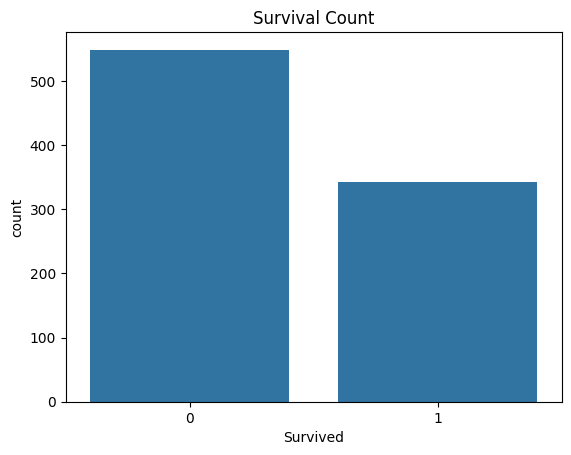

In [19]:
import seaborn as sns
sns.countplot(x='Survived',data=df)
plt.title('Survival Count')
plt.show()

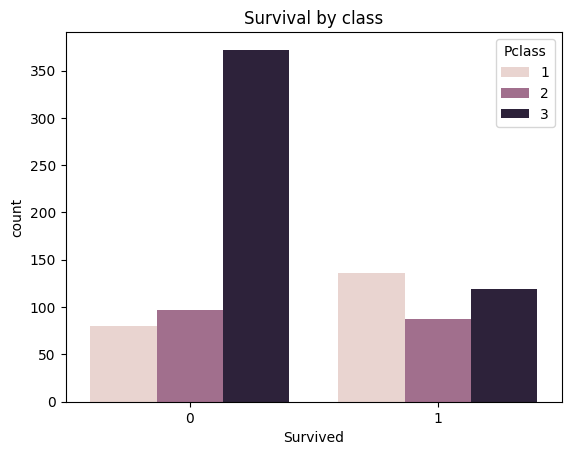

In [20]:
sns.countplot(x='Survived',hue='Pclass', data=df)
plt.title('Survival by class')
plt.show()


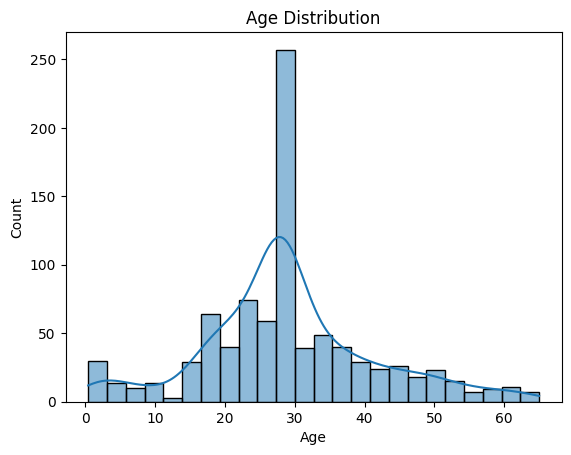

In [21]:
sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distribution')
plt.show()

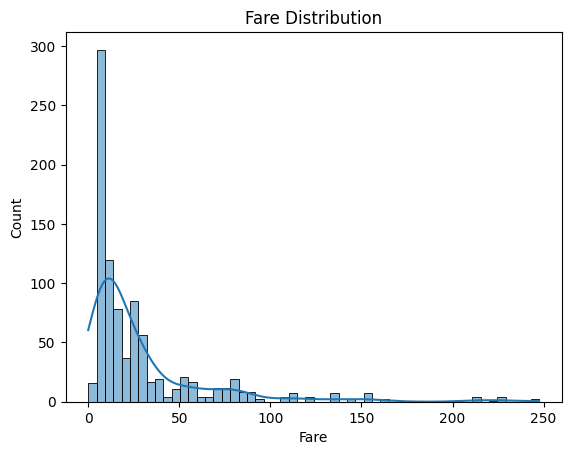

In [22]:
sns.histplot(x='Fare', data=df, kde=True)
plt.title('Fare Distribution')
plt.show()


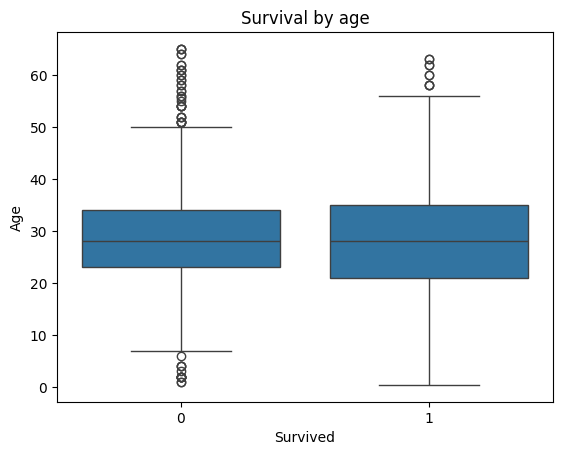

In [23]:
sns.boxplot(x='Survived',y='Age',data=df)
plt.title('Survival by age')
plt.show()

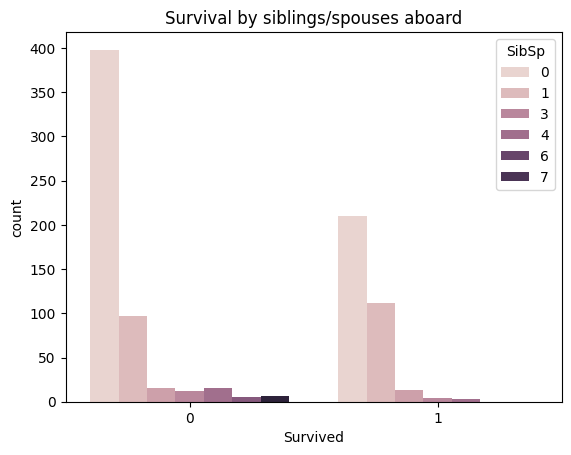

In [24]:
sns.countplot(x='Survived', hue='SibSp', data=df)
plt.title('Survival by siblings/spouses aboard')
plt.show()

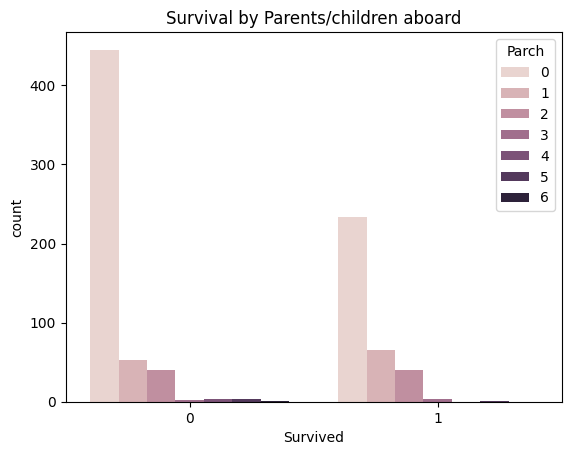

In [25]:
sns.countplot(x='Survived', hue='Parch', data=df)
plt.title('Survival by Parents/children aboard')
plt.show()


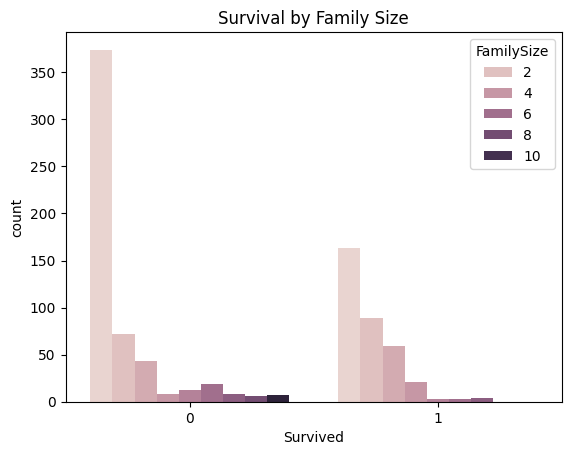

In [26]:
sns.countplot(x='Survived', hue='FamilySize', data=df)
plt.title('Survival by Family Size')
plt.show()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\shreshta sarkar\AppData\Local\Temp\ipykernel_14984\1090876872.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)


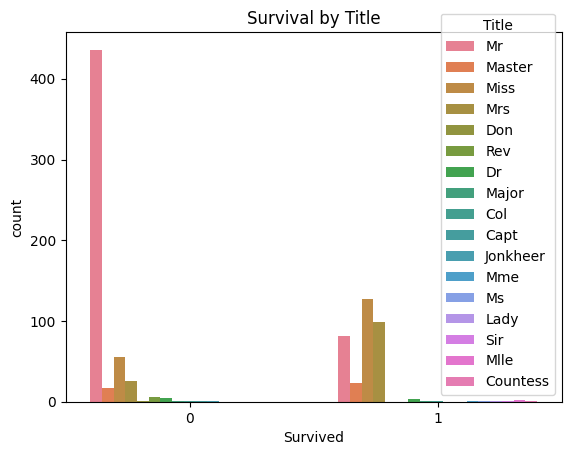

In [27]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
sns.countplot(x='Survived',hue='Title', data=df)
plt.title('Survival by Title')
plt.show()

In [28]:
survival_rate=df.groupby(['Pclass','Sex'])['Survived'].mean().reset_index()
survival_rate_age=df.groupby('AgeGroup')['Survived'].mean().reset_index()

C:\Users\shreshta sarkar\AppData\Local\Temp\ipykernel_14984\2362118241.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_age=df.groupby('AgeGroup')['Survived'].mean().reset_index()


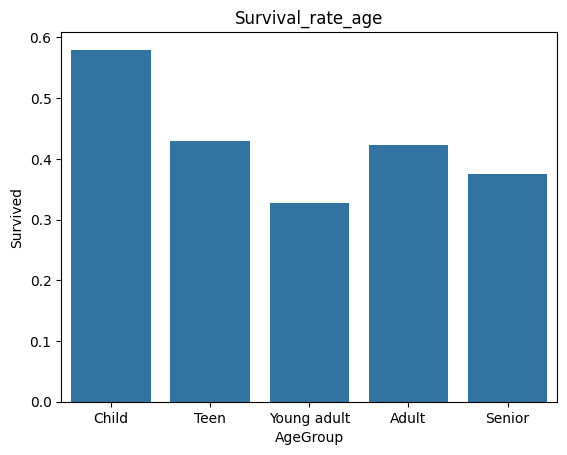

In [29]:
sns.barplot(x='AgeGroup', y='Survived', data=survival_rate_age)
plt.title('Survival_rate_age')
plt.show()